In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Change directory
%cd 'drive/My Drive/results/chipseq/'

/content/drive/My Drive/results/chipseq


In [3]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

  Using cached https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main


In [4]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

# ANECDOTAL EXAMPLES

In [5]:
! pip install logomaker
import logomaker
import pandas as pd
import matplotlib.pyplot as plt

     |████████████████████████████████| 11.8 MB 14.7 MB/s 


# Load sequences

In [15]:
def plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s):

    import logomaker
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FormatStrFormatter
    
    sine_dimensionsadapted=np.expand_dims(sine,3)

    # Raw saliency 
    N, L, A = saliency_map_raw[run_].shape
    for i in range(s,s+1):   #for i in range(len(X)):
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw[run_][i][l,a]

        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_ylabel('Saliency', fontsize=20)
        fig = plt.gcf()
        

    # Plot angles
    N, L, A  = sine_dimensionsadapted[run_].shape
    for i in range(s,s+1):   #for i in range(len(X)):
        counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = sine_dimensionsadapted[run_][i][l,a] 

        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.set_ylabel('Angle', fontsize=20)
        fig = plt.gcf()

    # Corrected saliency 
    N, L, A = saliency_map_raw_CORRECTED[run_].shape
    for i in range(s,s+1):   #for i in range(len(X)):
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw_CORRECTED[run_][i][l,a]

        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_ylabel('Saliency cor.', fontsize=20)
        fig = plt.gcf()

    # Ensemble saliency 
    N, L, A = saliency_map_raw_ensemble.shape
    for i in range(s,s+1):   #for i in range(len(X)):
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw_ensemble[i][l,a]

        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_ylabel('Saliency ens.', fontsize=20)
        fig = plt.gcf()



In [16]:
def plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2):

    import logomaker
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FormatStrFormatter

    sine_dimensionsadapted=np.expand_dims(sine,3)

    saliency_map_raw_CUT= saliency_map_raw[run_,:,b1:b2] 
    sine_dimensionsadapted_CUT=sine_dimensionsadapted[run_,:,b1:b2] 
    saliency_map_raw_CORRECTED_CUT= saliency_map_raw_CORRECTED[run_,:,b1:b2] 
    saliency_map_raw_ensemble_CUT = saliency_map_raw_ensemble[:,b1:b2] 


    # PLOT default saliency
    N, L, A = saliency_map_raw_CUT.shape
    for i in range(s,s+1):   
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw_CUT[i][l,a]
        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks([0,10,20,30,40])
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.figure.set_size_inches(7, 2)
        ax.set_ylabel('Saliency', fontsize=20)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)
        fig = plt.gcf()
    plt.title(experiment, fontsize=16, loc='center', pad=None)

    # PLOT angle
    N, L, A = sine_dimensionsadapted_CUT.shape
    for i in range(s,s+1):   
        counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = (sine_dimensionsadapted_CUT)[i][l,a] 
        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks([0,10,20,30,40])
        plt.ylim((-80,80)) 
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.figure.set_size_inches(7, 2)
        ax.set_ylabel('Angle', fontsize=20)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)    
        fig = plt.gcf()


    # Plot corrected saliency
    N, L, A = saliency_map_raw_CUT.shape
    for i in range(s,s+1):   
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw_CORRECTED_CUT[i][l,a]
        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks([0,10,20,30,40])
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.figure.set_size_inches(7, 2)
        ax.set_ylabel('Saliency cor.', fontsize=20)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)    
        fig = plt.gcf()


# Plot ensemble
    N, L, A = saliency_map_raw_CUT.shape
    for i in range(s,s+1):   
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw_ensemble_CUT[i][l,a]
        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks([0,10,20,30,40])
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.figure.set_size_inches(7, 2)
        ax.set_ylabel('Saliency ens.', fontsize=20)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)    
        fig = plt.gcf()   

In [17]:
import pickle
experiments = ['CTCF', 'MAX', 'ATF2', 'Arid3', 'BACH1', 'GABPA', 'ZNF24', 'ELK1', 'SRF', 'REST']

'''file_cnn_deep_relu = {}
file_cnn_deep_exp = {}
file_cnn_shallow_relu = {}
file_cnn_shallow_exp = {}

for experiment in experiments: 
    file_cnn_deep_relu[experiment] = open(experiment + "_cnn_deep_relu_results_seq.pickle", "rb")
    file_cnn_deep_exp[experiment] = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
    file_cnn_shallow_relu[experiment] = open(experiment + "_cnn_shallow_relu_results_seq.pickle", "rb")
    file_cnn_shallow_exp[experiment] = open(experiment + "_cnn_shallow_exponential_results_seq.pickle", "rb")''' 

# It may be memory-intensive to load all experiments at once; if this is the case, pick and plot one experiment (protein) only. You may avoid the largest experiment (CTCF).  
'''
results_seq={}
results_seq['deep_relu'] = {}
results_seq['deep_exp'] = {}
results_seq['shallow_relu'] = {}
results_seq['shallow_exp'] = {}

#For all proteins, if enough memory: 
for experiment in experiments: 
    print('loading ', experiment)
    results_seq['deep_relu'][experiment] = pickle.load(file_cnn_deep_relu[experiment])
    results_seq['deep_exp'][experiment] = pickle.load(file_cnn_deep_exp[experiment])
    results_seq['shallow_relu'][experiment] = pickle.load(file_cnn_shallow_relu[experiment])
    results_seq['shallow_exp'][experiment] = pickle.load(file_cnn_shallow_exp[experiment])'''

"\nresults_seq={}\nresults_seq['deep_relu'] = {}\nresults_seq['deep_exp'] = {}\nresults_seq['shallow_relu'] = {}\nresults_seq['shallow_exp'] = {}\n\n#For all proteins, if enough memory: \nfor experiment in experiments: \n    print('loading ', experiment)\n    results_seq['deep_relu'][experiment] = pickle.load(file_cnn_deep_relu[experiment])\n    results_seq['deep_exp'][experiment] = pickle.load(file_cnn_deep_exp[experiment])\n    results_seq['shallow_relu'][experiment] = pickle.load(file_cnn_shallow_relu[experiment])\n    results_seq['shallow_exp'][experiment] = pickle.load(file_cnn_shallow_exp[experiment])"

# CTCF protein

In [18]:
experiment = 'CTCF'  #Pick a protein from ['CTCF', 'MAX', 'ATF2', 'Arid3', 'BACH1', 'GABPA', 'ZNF24', 'ELK1', 'SRF', 'REST']

In [19]:
#For a single protein
import pickle

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
results = pickle.load(file_cnn_deep_exp)
Angles=np.array(results['angles'])

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
results_seq = pickle.load(file_cnn_deep_exp)

In [20]:
saliency_map_raw = np.array(results_seq['scores'])
saliency_map_raw_CORRECTED = np.array(results_seq['adj_scores']) 
saliency_map_raw_ensemble = np.mean(saliency_map_raw, axis=0)
sine = np.array(Angles)

In [21]:
run_=1 #Pick a run
s=0 #Pick a sequence 

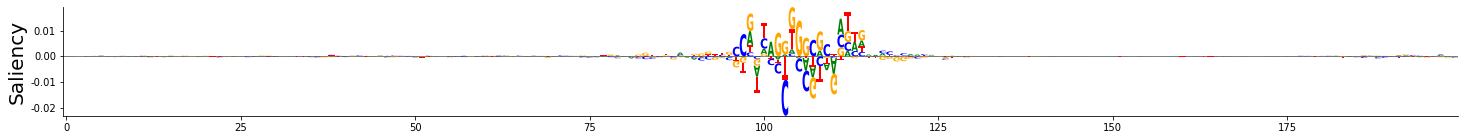

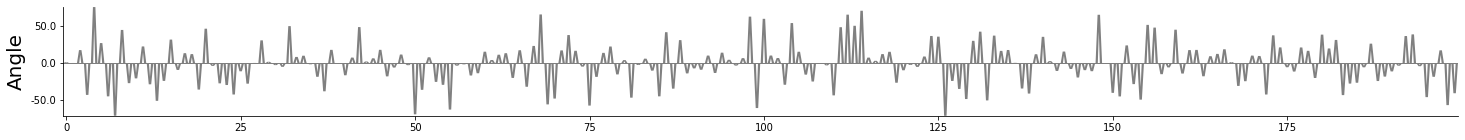

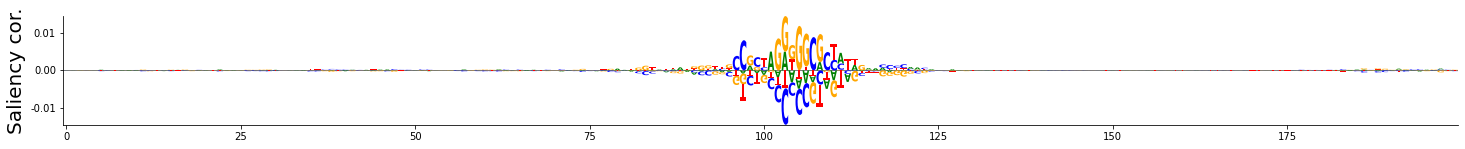

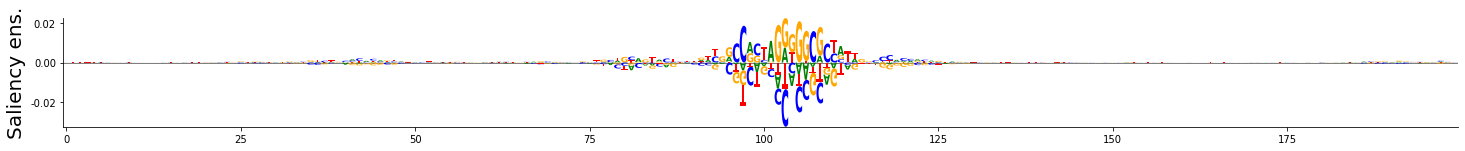

In [22]:
plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s)

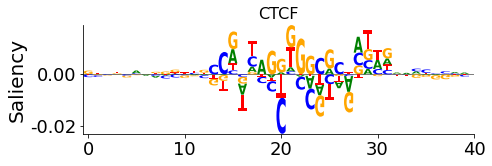

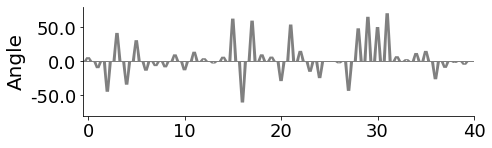

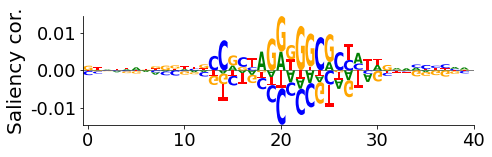

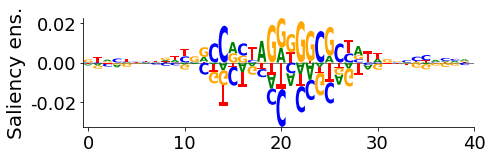

In [23]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=83  
b2=123  # b2=b1+40 is suggested (length of 40)

plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2)

# MAX protein

In [24]:
experiment = "MAX"

In [25]:
#For a single protein
import pickle

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
results = pickle.load(file_cnn_deep_exp)
Angles=np.array(results['angles'])

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
results_seq = pickle.load(file_cnn_deep_exp)

In [26]:
saliency_map_raw = np.array(results_seq['scores'])
saliency_map_raw_CORRECTED = np.array(results_seq['adj_scores']) 
saliency_map_raw_ensemble = np.mean(saliency_map_raw, axis=0)
sine = np.array(Angles)

In [27]:
run_=0 #Pick a run
s=1 #Pick a sequence 

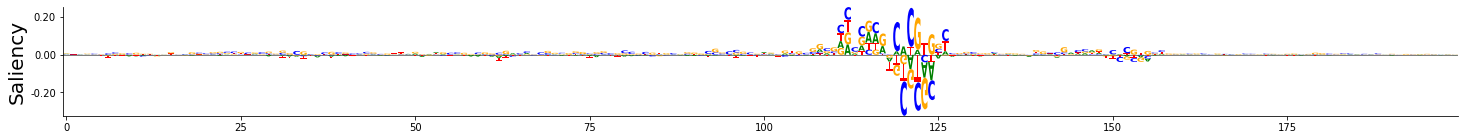

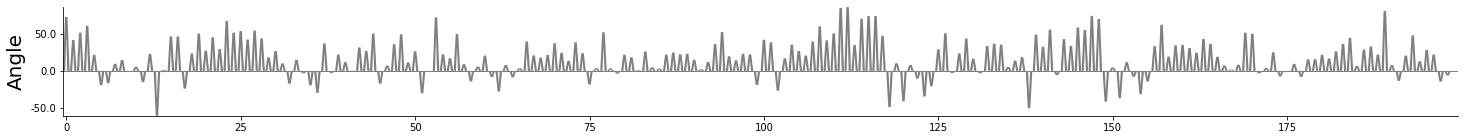

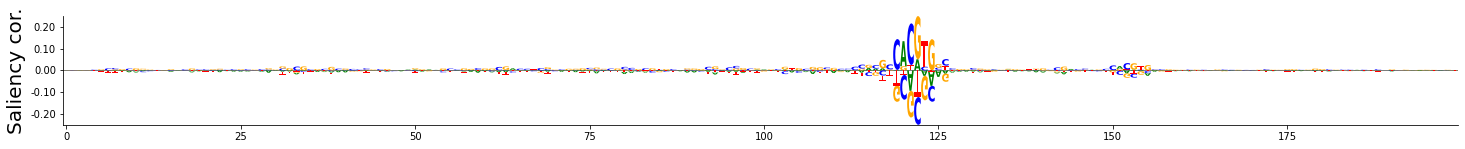

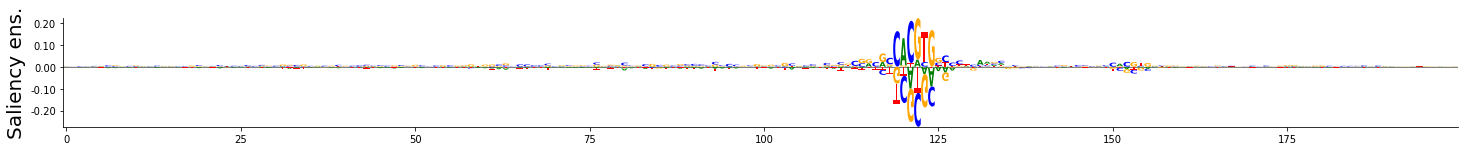

In [28]:
plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s)

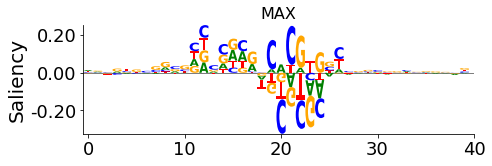

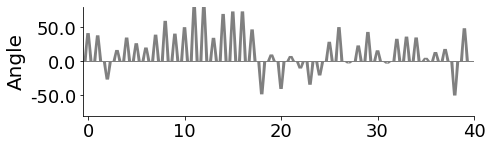

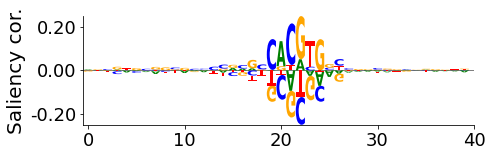

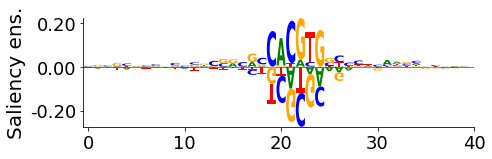

In [29]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=100  
b2=140  # b2=b1+40 is suggested (length of 40)

plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2)

# ATF2 protein

In [30]:
experiment = "ATF2"

In [31]:
#For a single protein
import pickle

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
results = pickle.load(file_cnn_deep_exp)
Angles=np.array(results['angles'])

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
results_seq = pickle.load(file_cnn_deep_exp)

In [32]:
saliency_map_raw = np.array(results_seq['scores'])
saliency_map_raw_CORRECTED = np.array(results_seq['adj_scores']) 
saliency_map_raw_ensemble = np.mean(saliency_map_raw, axis=0)
sine = np.array(Angles)

In [33]:
run_=2 #Pick a run
s=0 # Pick a sequence   

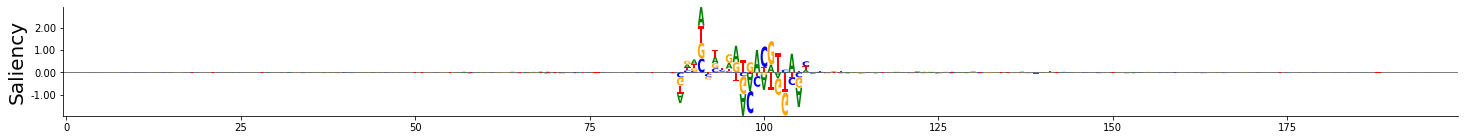

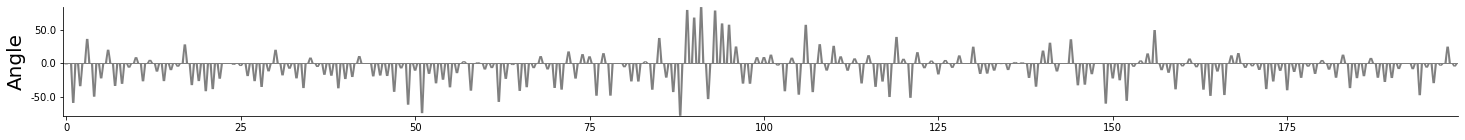

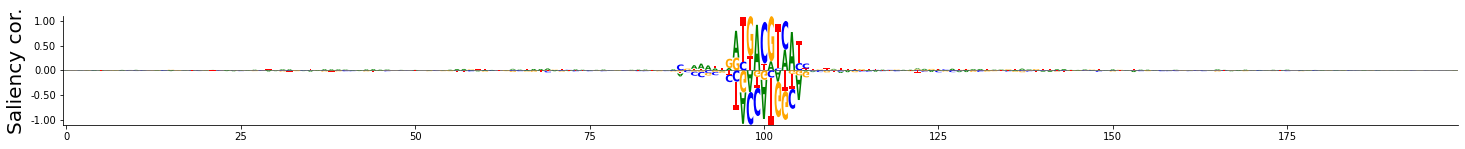

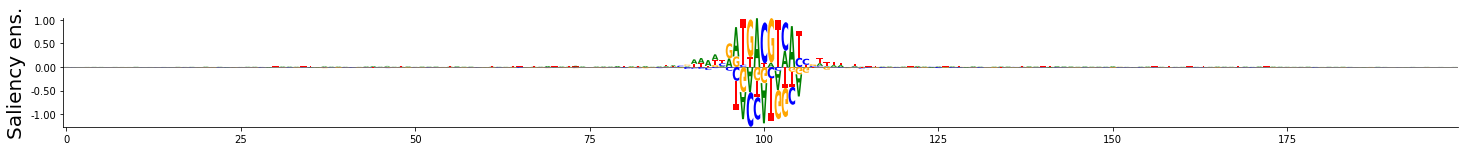

In [34]:
plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s)

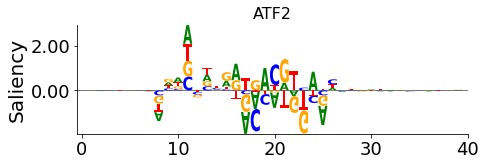

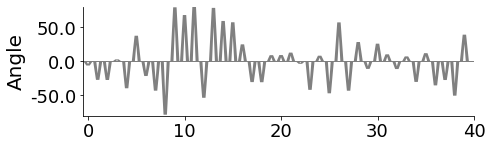

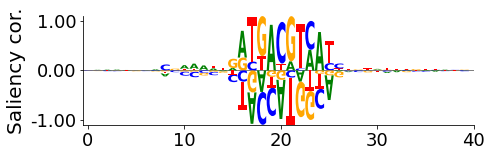

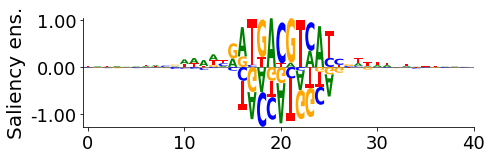

In [35]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=80 
b2=120  # b2=b1+40 is suggested (length of 40)

plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2)

# Arid3 protein

In [38]:
experiment = "Arid3"

In [39]:
#For a single protein
import pickle

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
results = pickle.load(file_cnn_deep_exp)
Angles=np.array(results['angles'])

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
results_seq = pickle.load(file_cnn_deep_exp)

In [40]:
saliency_map_raw = np.array(results_seq['scores'])
saliency_map_raw_CORRECTED = np.array(results_seq['adj_scores']) 
saliency_map_raw_ensemble = np.mean(saliency_map_raw, axis=0)
sine = np.array(Angles)

In [41]:
run_=0 #Pick a run
s=7 # Pick a sequence  

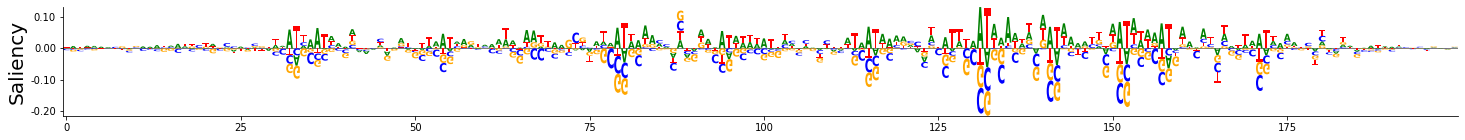

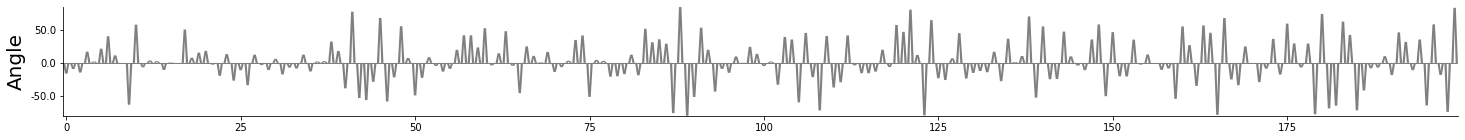

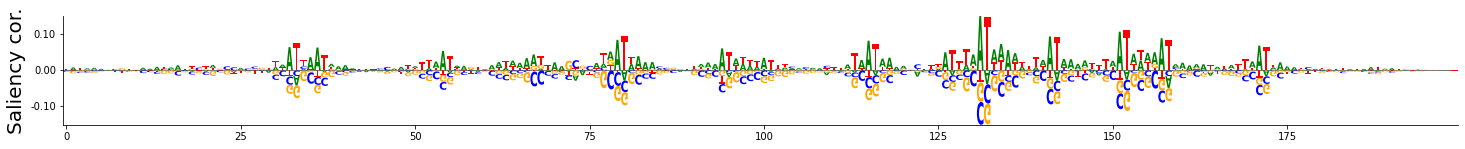

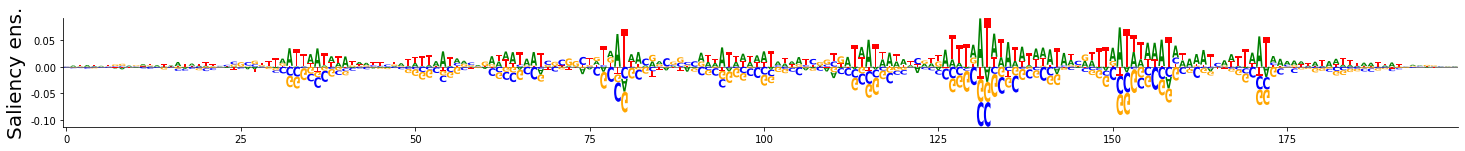

In [42]:
plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s)

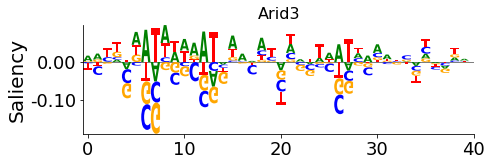

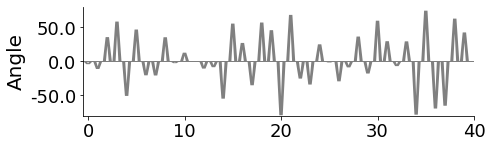

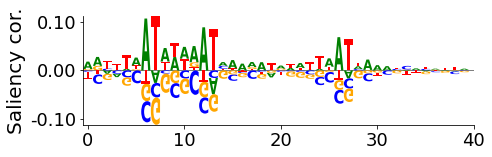

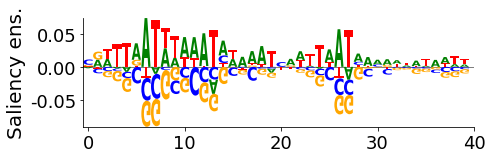

In [43]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=145  
b2=185  # b2=b1+40 is suggested (length of 40)

plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2)

# BACH1 protein

In [44]:
experiment = "BACH1"

In [45]:
#For a single protein
import pickle

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
results = pickle.load(file_cnn_deep_exp)
Angles=np.array(results['angles'])

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
results_seq = pickle.load(file_cnn_deep_exp)

In [46]:
saliency_map_raw = np.array(results_seq['scores'])
saliency_map_raw_CORRECTED = np.array(results_seq['adj_scores']) 
saliency_map_raw_ensemble = np.mean(saliency_map_raw, axis=0)
sine = np.array(Angles)

In [47]:
run_=30 #Pick a run
s=15 # Pick a sequence    

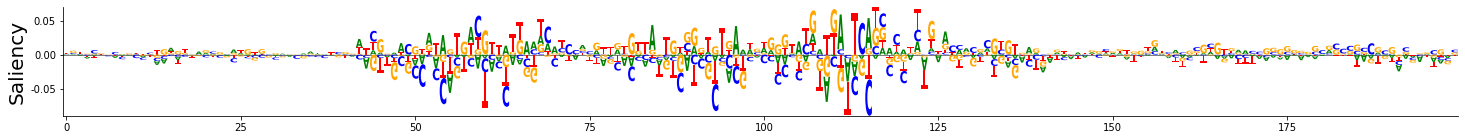

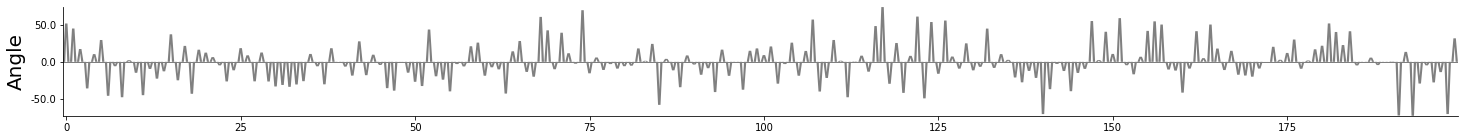

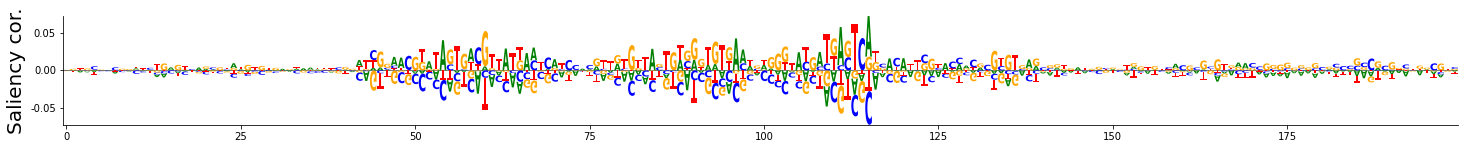

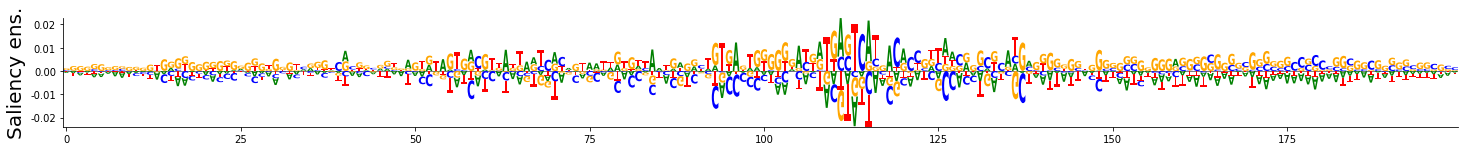

In [48]:
plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s)

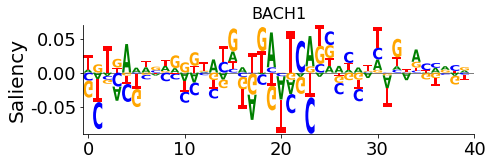

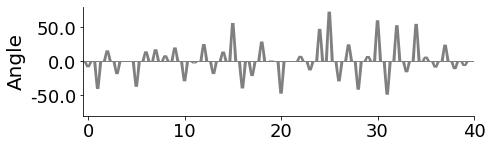

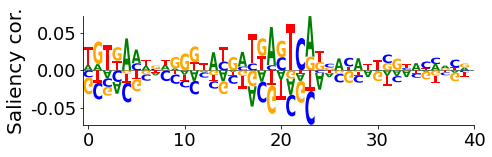

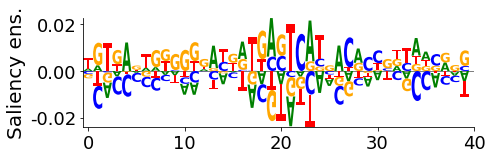

In [49]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=92
b2=132  # b2=b1+40 is suggested (length of 40)

plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2)

# GABPA protein

In [50]:
experiment = "GABPA"

In [51]:
#For a single protein
import pickle

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
results = pickle.load(file_cnn_deep_exp)
Angles=np.array(results['angles'])

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
results_seq = pickle.load(file_cnn_deep_exp)

In [52]:
saliency_map_raw = np.array(results_seq['scores'])
saliency_map_raw_CORRECTED = np.array(results_seq['adj_scores']) 
saliency_map_raw_ensemble = np.mean(saliency_map_raw, axis=0)
sine = np.array(Angles)

In [53]:
run_=1 #Pick a run
s=0 # Pick a sequence  

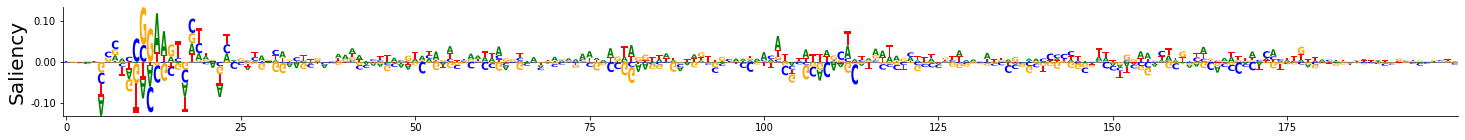

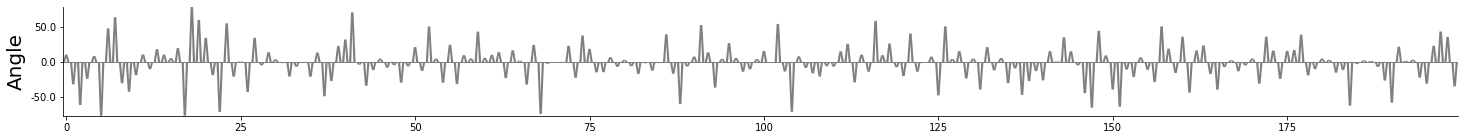

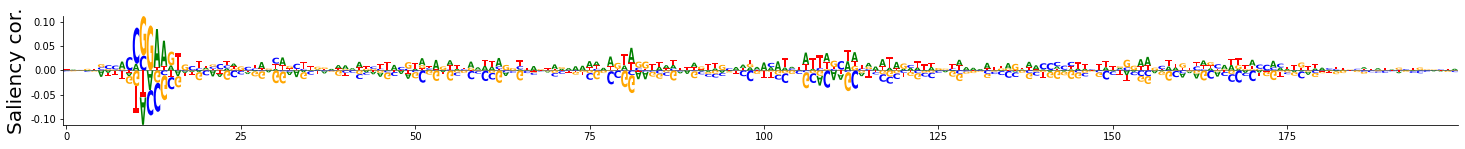

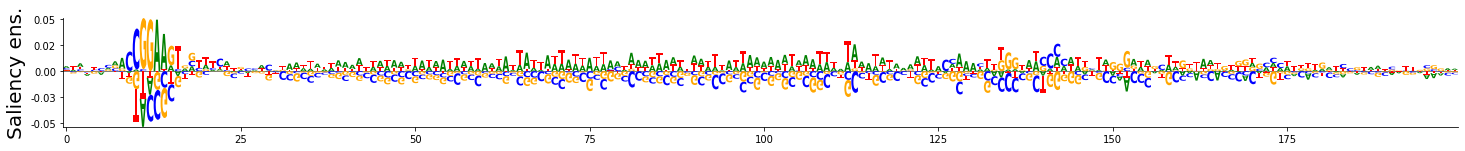

In [54]:
plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s)

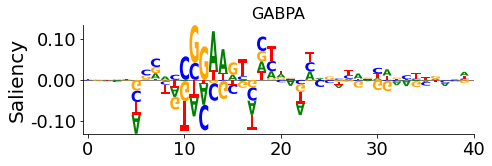

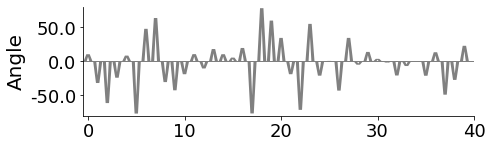

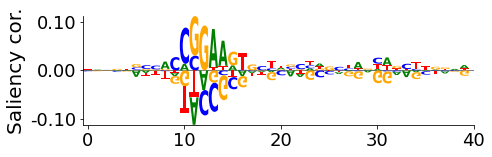

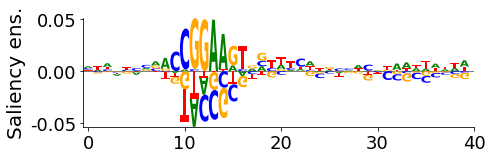

In [55]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=0 
b2=40  # b2=b1+40 is suggested (length of 40)

plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2)

# ZNF24 protein

In [56]:
experiment = "ZNF24"

In [57]:
#For a single protein
import pickle

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
results = pickle.load(file_cnn_deep_exp)
Angles=np.array(results['angles'])

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
results_seq = pickle.load(file_cnn_deep_exp)

In [58]:
saliency_map_raw = np.array(results_seq['scores'])
saliency_map_raw_CORRECTED = np.array(results_seq['adj_scores']) 
saliency_map_raw_ensemble = np.mean(saliency_map_raw, axis=0)
sine = np.array(Angles)

In [59]:
run_=1 #Pick a run
s=1 # Pick a sequence     

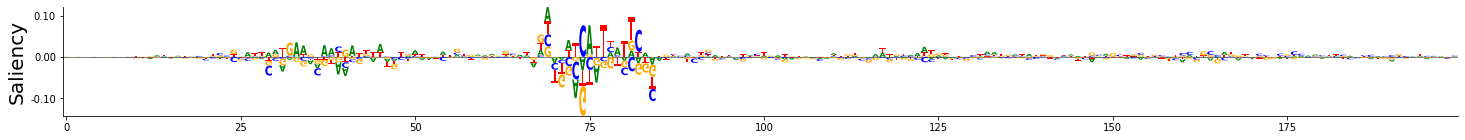

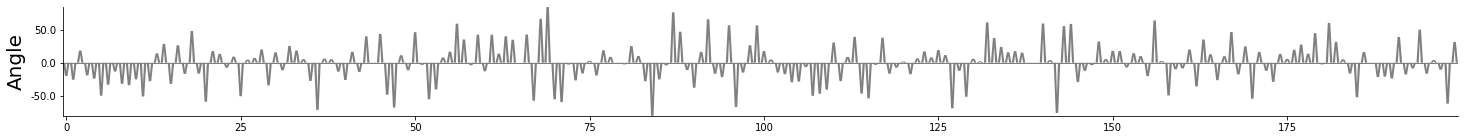

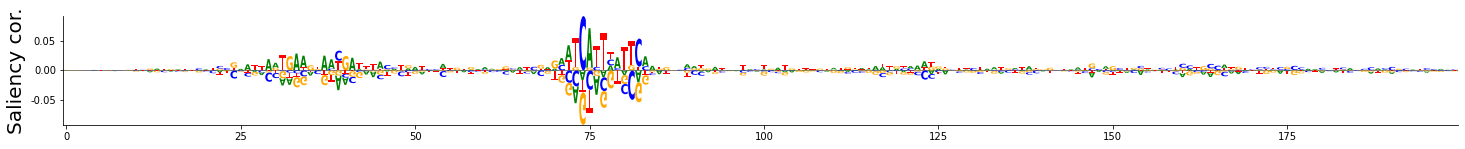

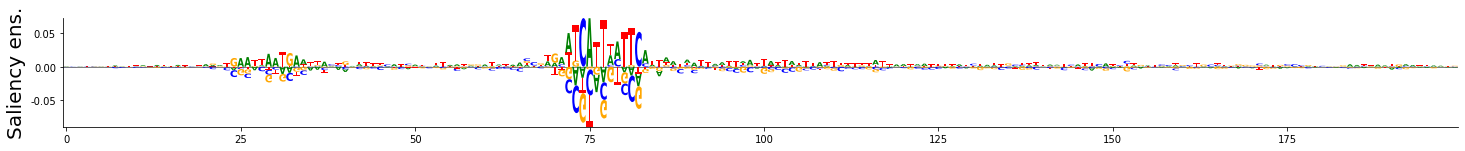

In [60]:
plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s)

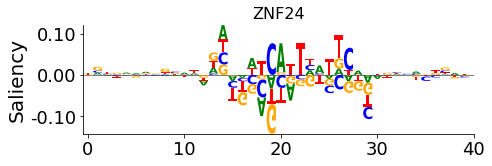

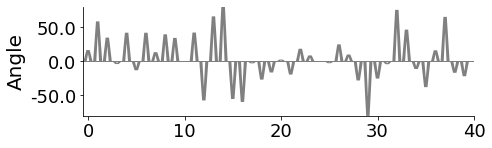

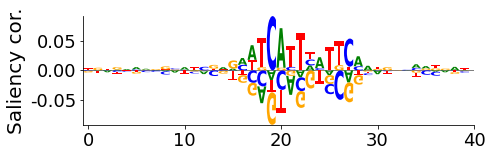

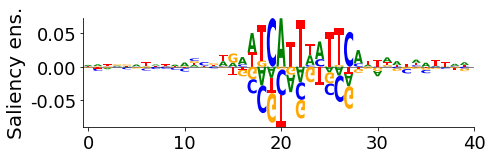

In [61]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=55 
b2=95  # b2=b1+40 is suggested (length of 40)

plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2)

# ELK1 protein

In [62]:
experiment = "ELK1"

In [63]:
#For a single protein
import pickle

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
results = pickle.load(file_cnn_deep_exp)
Angles=np.array(results['angles'])

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
results_seq = pickle.load(file_cnn_deep_exp)

In [64]:
saliency_map_raw = np.array(results_seq['scores'])
saliency_map_raw_CORRECTED = np.array(results_seq['adj_scores']) 
saliency_map_raw_ensemble = np.mean(saliency_map_raw, axis=0)
sine = np.array(Angles)

In [65]:
run_=34 #Pick a run     
s=1 # Pick a sequence    

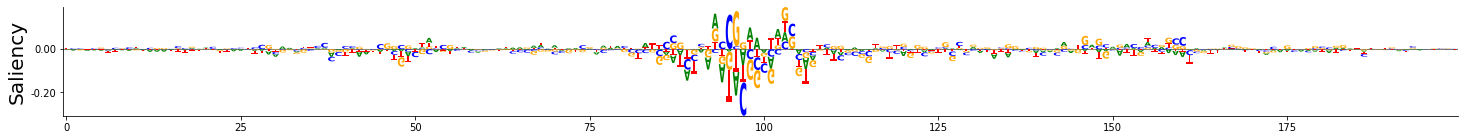

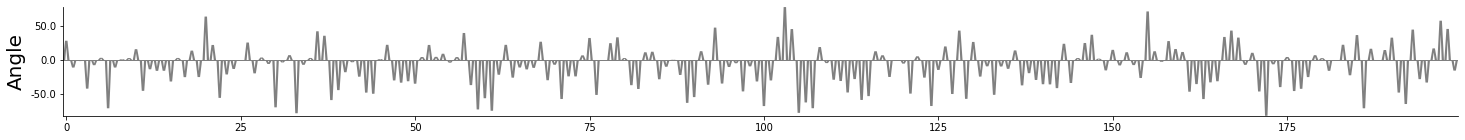

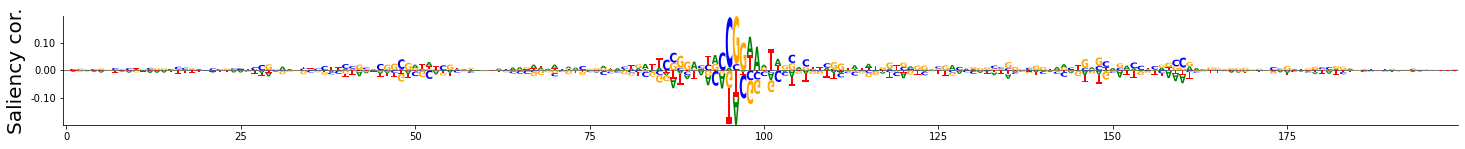

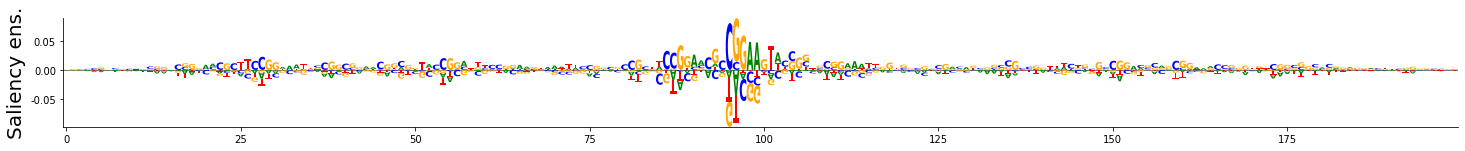

In [66]:
plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s)

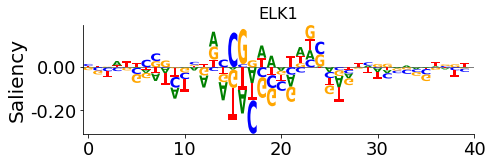

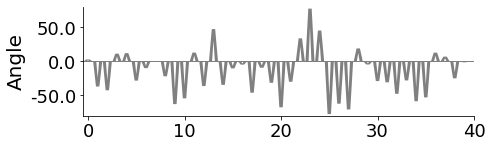

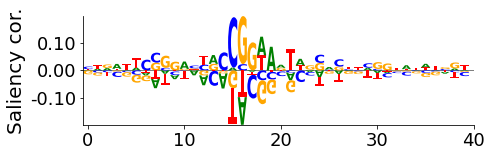

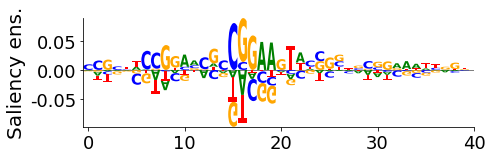

In [67]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=80 
b2=120  # b2=b1+40 is suggested (length of 40)

plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2)

# SRF protein

In [68]:
experiment = "SRF"

In [69]:
#For a single protein
import pickle

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
results = pickle.load(file_cnn_deep_exp)
Angles=np.array(results['angles'])

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
results_seq = pickle.load(file_cnn_deep_exp)

In [70]:
saliency_map_raw = np.array(results_seq['scores'])
saliency_map_raw_CORRECTED = np.array(results_seq['adj_scores']) 
saliency_map_raw_ensemble = np.mean(saliency_map_raw, axis=0)
sine = np.array(Angles)

In [71]:
run_=0 #Pick a run
s=1 # Pick a sequence  

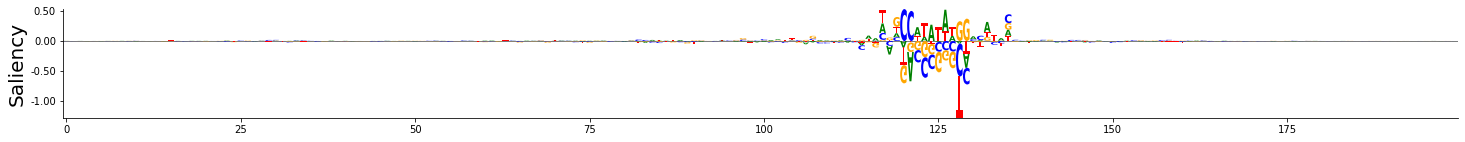

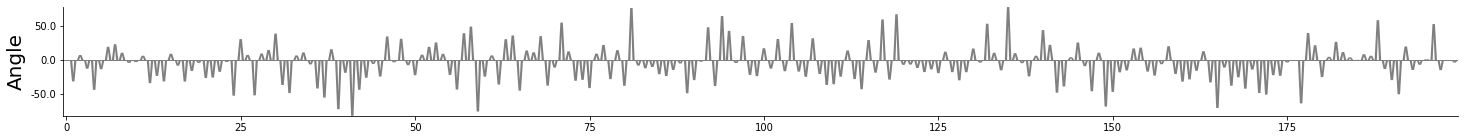

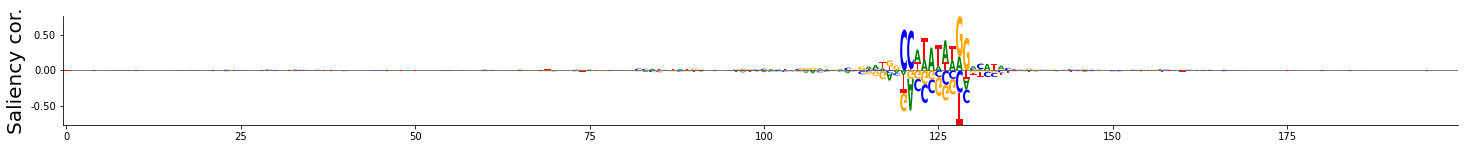

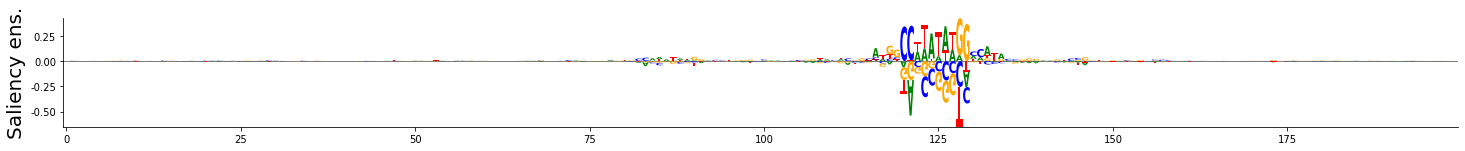

In [72]:
plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s)

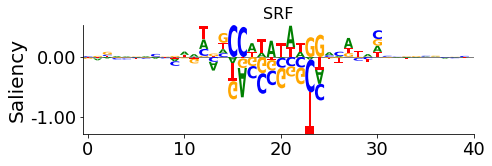

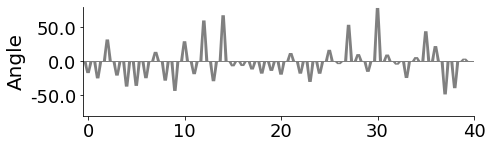

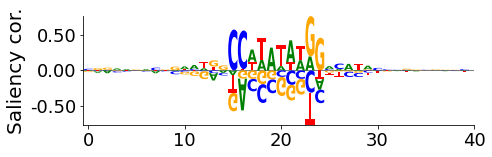

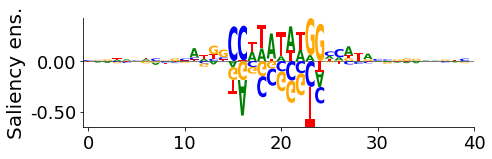

In [73]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=105 
b2=145  # b2=b1+40 is suggested (length of 40)

plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2)

# REST protein

In [74]:
experiment = "REST"

In [75]:
#For a single protein
import pickle

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
results = pickle.load(file_cnn_deep_exp)
Angles=np.array(results['angles'])

file_cnn_deep_exp = open(experiment + "_cnn_deep_exponential_results_seq.pickle", "rb")
results_seq = pickle.load(file_cnn_deep_exp)

In [76]:
saliency_map_raw = np.array(results_seq['scores'])
saliency_map_raw_CORRECTED = np.array(results_seq['adj_scores']) 
saliency_map_raw_ensemble = np.mean(saliency_map_raw, axis=0)
sine = np.array(Angles)

In [77]:
run_=0 #Pick a run
s=3 # Pick a sequence   

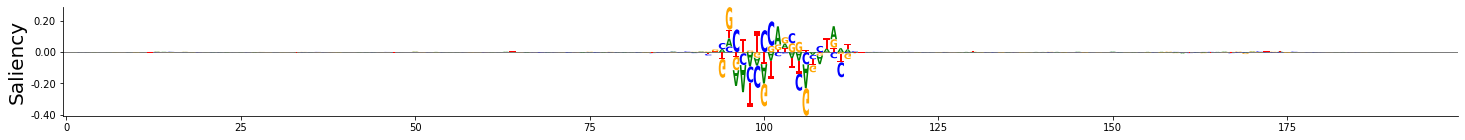

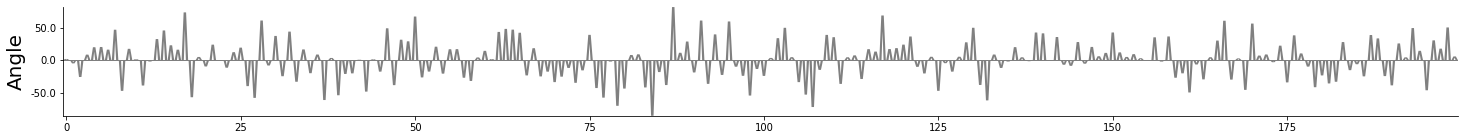

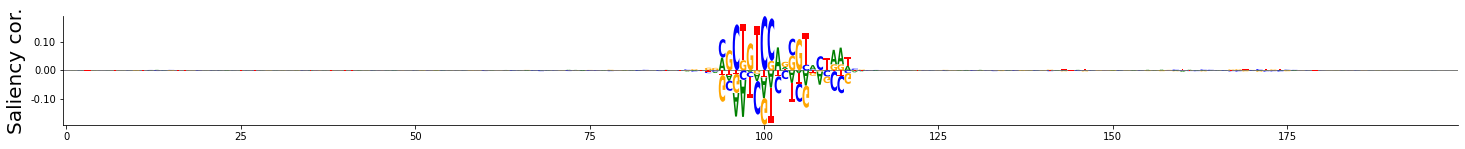

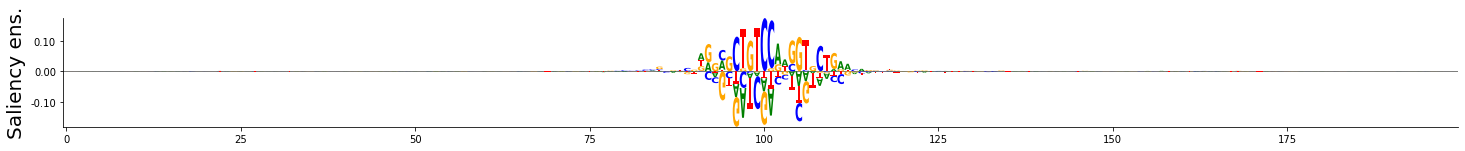

In [78]:
plot_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s)

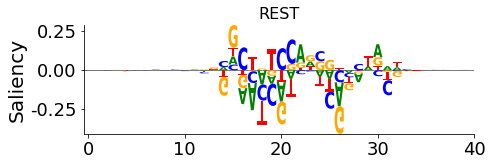

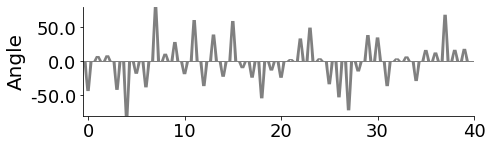

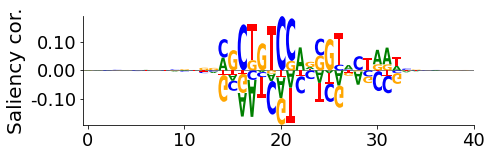

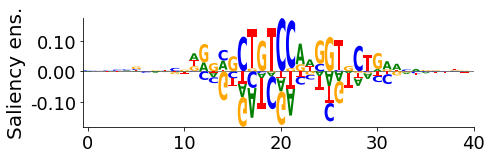

In [79]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=80 
b2=120  # b2=b1+40 is suggested (length of 40)

plot_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2)